In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd

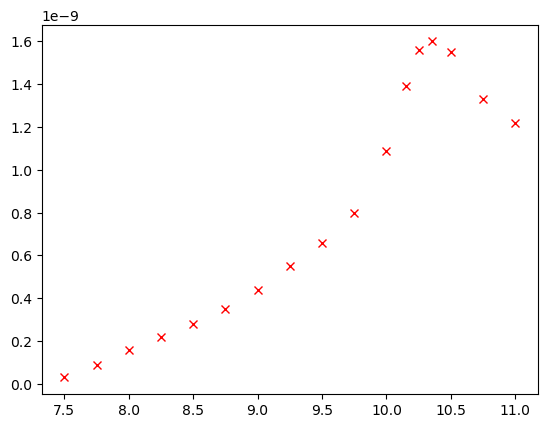

In [3]:
# Aufgabe 1

# Restgasspektrum
E_e = 64.96 #V
E_e_std = 0.05 #V
# 1-50 Tek 27 10**-10 (Partialdruckfaktor)
# 50-100 Tek 28 10**-10 (Partialdruckfaktor)

# Messung des Partialdrucks bei verschiedenen I_e
poti_stellung = np.array([11, 10.75, 10.5 , 10.35, 10.25 , 10.15 , 10.0 , 9.75 , 9.5 , 9.25 , 9.0 , 8.75 , 8.5 , 8.25 , 8.0 , 7.75 , 7.5])
# I_e = np.array([]) # Umrechnung über Tabelle (gerade)
p = np.array([ 1.22 , 1.33, 1.55 , 1.6 , 1.56 , 1.39 , 1.09 , 0.80 , 0.66 , 0.55 , 0.44 , 0.35 , 0.28 , 0.22 , 0.16 , 0.09 , 0.03]) * 10**-9 # mbar
p_std = 0.02 * 10**-9
m = 14 # Masse von N2

plt.plot(poti_stellung, p, "rx")


# allgemeiner Aufschrieb

Ionisationsmessröhre bei 5.6 * 10 ** -7 mbar
Potentiometer dauerhaft bei 10.15
Auflösung durch FWHM

Luftspektrum: 10 ** -9   
Massezahl 18: 10 ** -10  TEK29
Massezahl 28: 10 ** -9   TEK30
Massezahl 32: 10 ** -9   TEK31
Massezahl 44: 10 ** -10  TEK32

Ionisationsmessröhre bei 1.2 * 10 ** -6 mbar
Massezahl 14: 10 ** -10 TEK34 / TEK37
Massezahl 28: 10 ** -10 TEK36

Argon
Ionisationsmessröhre bei 5.3 * 10 ** -6 mbar
Massezahl 40: 10 ** -10 TEK38 / TEK40
Massezahl 20: 10 ** -10 TEK39

Propan
E_e = [30,60,90]
TEK41 10 ** -9
TEK42 10 ** -8 
TEK43 10 ** -7 (80)
TEK44 10 ** -7 (90)

Tigel



# 3. Dissoziationsenergien Stickstoff 

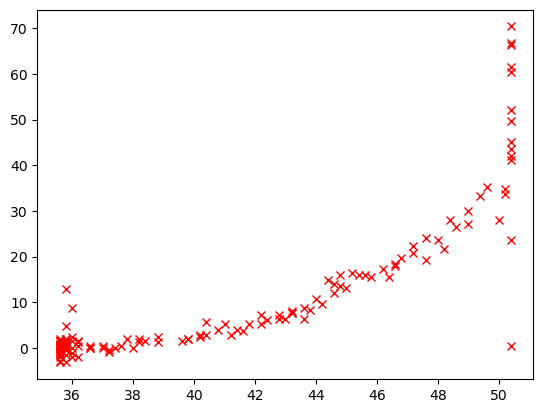

In [4]:
#pressure inside the camber at 9.0*10^-8 mBar
def read_Tek(file, cutoff=[0,1]):

    file = Path().resolve() / file

    try:    
        data=pd.read_csv(file,skiprows=16)
        data=data.set_axis(["time", "Ch1","Ch2"],axis=1)
        length=len(data["time"])
        data = data.iloc[int(length*cutoff[0]):int(length*cutoff[1])]
        return data
    
    except Exception as e:
        print(e)
        try:    
            data=pd.read_csv(file,skiprows=16)
            data=data.set_axis(["time", "Ch2"],axis=1)
            length=len(data["time"])
            data = data.iloc[int(length*cutoff[0]):int(length*cutoff[1])]
            return data
        except Exception as e:
            return pd.DataFrame(0, index=range(2), columns=["time", "Ch1","Ch2"])
        
raumluft_14_1 = read_Tek("Data\\Raumluft_MS14(1).CSV")
raumluft_14_2 = read_Tek("Data\\Raumluft_MS14(2).CSV")
raumluft_24 = read_Tek("Data\\Raumluft_MS24.CSV")

plt.plot(-raumluft_14_1["Ch1"][::15]/10, raumluft_14_1["Ch2"][::15], "rx", label="1 Raumluft bei m=14")
# plt.plot(np.linspace(36,50,50), 27*np.linspace(36,50,50)/7-145)
# plt.show()
# plt.plot(-raumluft_14_2["Ch1"][::15]/10, raumluft_14_2["Ch2"][::15], "rx", label="2 Raumluft bei m=14")
# plt.show()
# plt.plot(-raumluft_24["Ch1"][::10]/10, raumluft_24["Ch2"][::10], "gx", label="Raumluft bei m=28")
# plt.legend()
plt.show()
# plt.plot(raumluft_24["time"], raumluft_24["Ch1"]/10)
# plt.plot(raumluft_24["time"], raumluft_24["Ch2"])

# plt.legend()

# 4 Quantitative Analyse

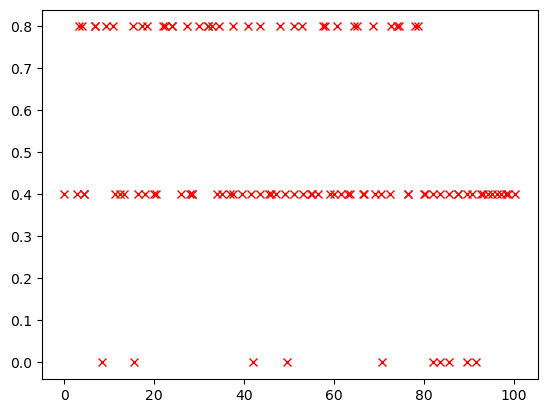

In [5]:
rsp1 = read_Tek("Data\\Raumluft(1-50).CSV")
rsp2 = read_Tek("Data\\Raumluft(50-100).CSV")


rsp3df = data=pd.read_csv(f"{Path().resolve()}\\Data\\Raumluft(50-100).CSV",skiprows=15)
rsp3 = np.array([rsp3df["CH1"][219:1815] , rsp3df["CH2"][219:1815]])
plt.plot(rsp3[0][::15],rsp3[1][::15], "rx")
# plt.plot(rsp1["Ch1"][::15], rsp1["Ch2"][::15], "rx")
# plt.plot(rsp2["Ch1"][::15], rsp2["Ch2"][::15], "rx")
# plt.plot(np.linspace(0,50), np.ones(50)*21.2)
# plt.plot(np.linspace(0,50), np.ones(50)*4.)
# plt.show()
# plt.plot(rsp2["Ch1"][::20]/2 + 50, rsp2["Ch2"][::20], "gx")
# plt.show()

# 5 Qualitative Analyse

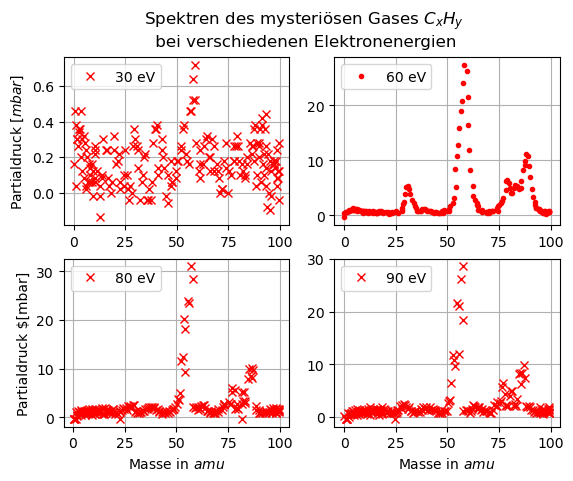

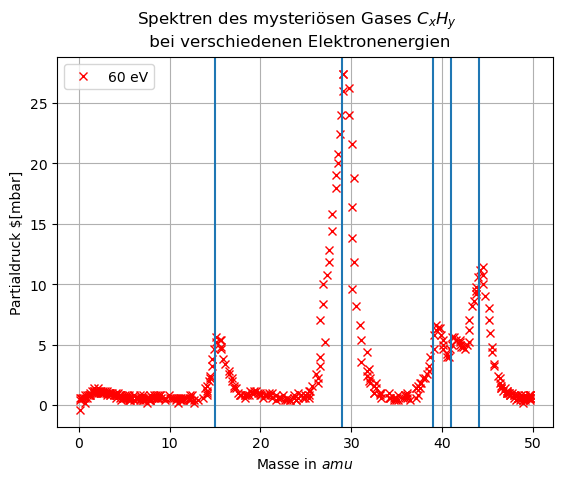

In [6]:
propan30 = read_Tek("Data\\Propan_E30.CSV")
propan60 = read_Tek("Data\\Propan_E60.CSV")
propan80 = read_Tek("Data\\Propan_E80.CSV")
propan90 = read_Tek("Data\\Propan_E90.CSV")

fig, ax = plt.subplots(2,2)
ax[0][0].plot(propan30["Ch1"][::10], propan30["Ch2"][::10], "rx", label="30 eV")
ax[0][1].plot(propan60["Ch1"][::10], propan60["Ch2"][::10], "r.", label="60 eV")
ax[1][0].plot(propan80["Ch1"][::10], propan80["Ch2"][::10], "rx", label="80 eV")
ax[1][1].plot(propan90["Ch1"][::10], propan90["Ch2"][::10], "rx", label= "90 eV")
for i in [0,1]:
    for j in [0,1]:
        ax[i][j].grid()
        ax[i][j].legend()

# ax[0][0].fill_between(propan30["Ch1"][::10], propan30["Ch2"][::10], color="red")
# ax[0][1].fill_between(propan60["Ch1"][::10], propan60["Ch2"][::10], color="red")
# ax[1][0].fill_between(propan80["Ch1"][::10], propan80["Ch2"][::10], color="red")
# ax[1][1].fill_between(propan90["Ch1"][::10], propan90["Ch2"][::10], color="red")

ax[0][0].set(xlabel="", ylabel="Partialdruck $[mbar]$")
ax[1][0].set(xlabel="Masse in $amu$", ylabel="Partialdruck $[mbar]")
ax[1][1].set(xlabel="Masse in $amu$", ylabel="")
fig.suptitle("Spektren des mysteriösen Gases $C_xH_y$ \n bei verschiedenen Elektronenergien")

fig2, ax2 = plt.subplots()
ax2.plot(propan60["Ch1"][::5]/2, propan60["Ch2"][::5], "rx", label="60 eV")
ax2.grid()
ax2.legend()
ax2.set(xlabel="Masse in $amu$", ylabel="Partialdruck $[mbar]")
fig2.suptitle("Spektren des mysteriösen Gases $C_xH_y$ \n bei verschiedenen Elektronenergien")

ax2.axvline(x=15)
ax2.axvline(x=29)
ax2.axvline(x=39)
ax2.axvline(x=41)
ax2.axvline(x=44)